# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


np.random.seed(1) # set this to ensure the results are repeatable. 

In [24]:
conda install -c conda-forge ipympl

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\hiran\anaconda3

  added / updated specs:
    - ipympl


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _anaconda_depends-2022.10  |           py39_2          68 KB
    anaconda-custom            |           py39_1           4 KB
    ca-certificates-2022.12.7  |       h5b45459_0         143 KB  conda-forge
    certifi-2022.12.7          |     pyhd8ed1ab_0         147 KB  conda-forge
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    ipympl-0.9.3               |     pyhd8ed1ab_0         206 KB  conda-forge
    openssl-1.1.1t             |       h2bbff1b_0         5.5 MB
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ruamel.yaml-0.17.21        |   py39hb82d6ee_1         169 KB  conda-forge
    ruamel.yaml.clib-0.2.6     |   py39h2b


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2022.05=py39_0
  - defaults/win-64::scikit-learn-intelex==2021.5.0=py39haa95532_0


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda





conda-22.11.1        | 908 KB    |            |   0% 
conda-22.11.1        | 908 KB    | ########## | 100% 
conda-22.11.1        | 908 KB    | ########## | 100% 

_anaconda_depends-20 | 68 KB     |            |   0% 
_anaconda_depends-20 | 68 KB     | ########## | 100% 

anaconda-custom      | 4 KB      |            |   0% 
anaconda-custom      | 4 KB      | ########## | 100% 

ruamel.yaml-0.17.21  | 169 KB    |            |   0% 
ruamel.yaml-0.17.21  | 169 KB    | ########## | 100% 
ruamel.yaml-0.17.21  | 169 KB    | ########## | 100% 

ruamel.yaml.clib-0.2 | 101 KB    |            |   0% 
ruamel.yaml.clib-0.2 | 101 KB    | ########## | 100% 

ca-certificates-2022 | 143 KB    |            |   0% 
ca-certificates-2022 | 143 KB    | ########## | 100% 
ca-certificates-2022 | 143 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... 

    Windows 64-bit packages of scikit-learn can be accelerate

## Step 2:  Define a hidden linear relationship/model

First let's define our relationship (normally, this is hidden, but since we are creating the data, we will need to identify this)

In [2]:
b0 = 0  # y intercept
b1 = -1 # slope for x1
b2 = 1 # slope for x2

## Step 3: Create input and output data using the model

Let's set the number of observations that we will synthesize...

In [3]:
sample_size = 1000

In [4]:
x1_mean = 100
x1_stdev = 10
x1 = np.round(np.random.normal(x1_mean, x1_stdev, sample_size),2)

x2_mean = 100
x2_stdev = 10
x2 = np.round(np.random.normal(x2_mean, x2_stdev, sample_size),2)

Once we have the X values (input), we can generate y values using our 'hidden' model...

In [5]:
y = b0 + b1*x1 + b2*x2

But, this is rather boring data to analyze, because the 'hidden' model is not really hidden at all...

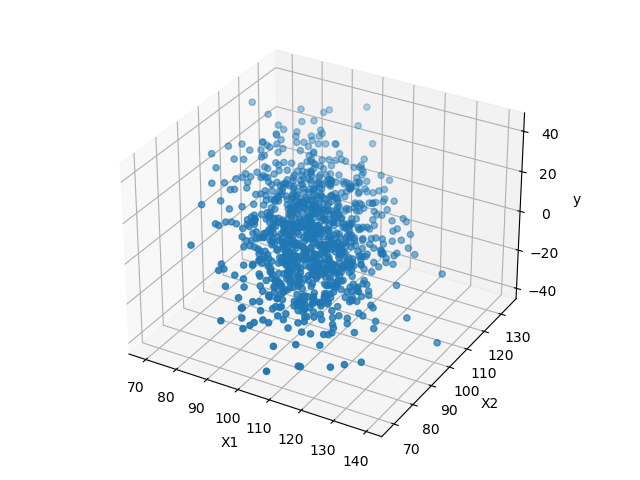

In [6]:
# this is a notebook 'MAGIC' that will allow for creation of interactive plot
%matplotlib widget 

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

%matplotlib inline

## Step 4: Add some random noise to 'hide' the model

Now, let's obscure the model by adding noise to the data by adding errors that are randomly selected from a norma distribution

In [7]:
e_mean = 0
e_stdev = 10
e = np.round(np.random.normal(e_mean, e_stdev, sample_size), 2) # round to two decimal places
y = y + e

## Step 5: Explore the resulting synthesized data

Now, let's look at a scatter plot of both the X and y data with the noise added in...

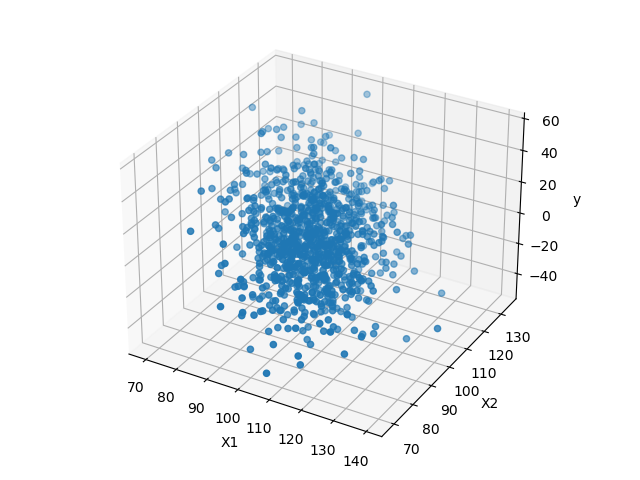

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(x1, x2, y)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

### Step 6: Create a pandas data frame from the data

Since our goal is to generate data that we can analyze with another notebook (for practice), let's save this data to a csv. 

First we will create a dataframe with the data we just similated...

In [9]:
df = pd.DataFrame({'x1': x1, 'x2' : x2, 'target': y})
df

,x1,x2,target
0,116.24,98.47,-12.87
1,93.88,75.67,-15.82
2,94.72,105.08,5.88
3,89.27,96.76,1.38
4,108.65,84.89,-44.06
...,...,...,...
995,98.84,101.89,-4.67
996,77.23,105.61,22.15
997,99.30,90.78,-10.03
998,103.54,106.47,-11.07


## Step 7: Save the data frame contents to a csv

Lastly, let's save the data we created to a csv file. This saved data will be used to practice finding hidden relationships in data.

In [10]:
df.to_csv('c02_dataset_2.csv', index=False)